In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [4]:
data.shape

(21, 2)

In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data1 = data.rename(columns= {'Delivery Time' : 'dt' ,'Sorting Time' : 'st'},inplace=False)
print(data1)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data1.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<AxesSubplot:xlabel='st', ylabel='dt'>

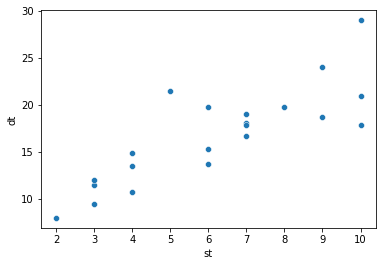

In [10]:
sns.scatterplot(x=data1.st,y=data1.dt)

<AxesSubplot:>

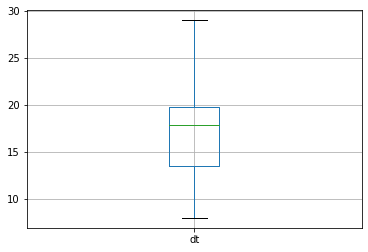

In [11]:
data1.boxplot(column='dt')

<AxesSubplot:>

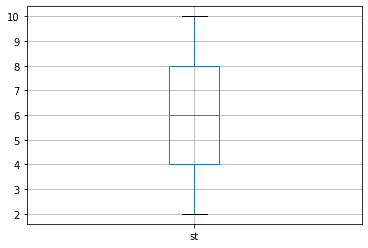

In [12]:
data1.boxplot(column='st')

In [13]:
import statsmodels.formula.api as smf

In [14]:
model = smf.ols('dt~st',data = data1).fit()
model

<AxesSubplot:xlabel='st', ylabel='dt'>

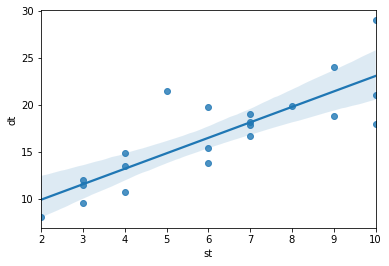

In [15]:
sns.regplot(data = data1,x='st',y='dt')

In [16]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        16:58:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [19]:
model_2 = smf.ols('dt~np.log(st)',data = data1).fit()
model_2

In [20]:
model_2.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [21]:
model_2.rsquared,model.rsquared_adj

(0.6954434611324223, 0.6655489208860244)

In [22]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.64e-06
Time:                        16:58:31   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.conf_int(0.05) 

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [24]:
model_2.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [25]:
pred = model.predict(data1)
pred


0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [26]:
pred_1 = model_2.predict(data1)
pred_1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Delivering Time')

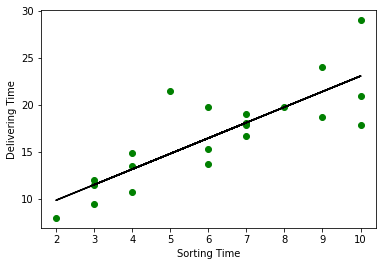

In [27]:
plt.scatter(x='st',y='dt',data=data1,color='green')
plt.plot(data1.st,pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivering Time')

Text(0, 0.5, 'Delivering Time')

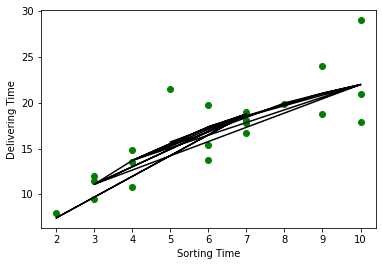

In [28]:
plt.scatter(x='st',y='dt',data=data1,color='green')
plt.plot(data1.st,pred_1,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivering Time')